<a href="https://colab.research.google.com/github/thalicsouza/via_hacka_ml/blob/main/ETL_Training_Val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df_compras = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/compra.csv")

In [ ]:
!pip install mysql-python
!pip install mysqlclient
!apt-get install libmysqlclient-dev
!apt-get install libmysqlclient-dev
!pip3 install mysqlclient

     |████████████████████████████████| 112kB 3.9MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
     |████████████████████████████████| 92kB 2.8MB/s 
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100097 sha256=409c59e835560c539df61e41b8578e37a1a3036e0ab14745bd17234525c57876
  Stored in directory: /root/.cache/pip/wheels/75/ca/e8/ad4e7ce3df18bcd91c7d84dd28c7c08db491a2a2360efed363
Successfully built mysqlclient
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmysqlclient-dev is already the newest version (5.7.33-0ubuntu0.18.04.1).
libmysqlclient-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tr

## Tabelas de Compras

In [ ]:
import MySQLdb
import sqlite3

In [ ]:
df_compras = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/compra.csv")

conn = sqlite3.connect("compras.db") 

In [ ]:
df_compras.to_sql('tlb_compras', conn)
            
sql_string = "SELECT IdCompra,SUM(ValorTotalComDesconto) AS VALOR_PEDIDO,IdCanalVenda,idbandeira FROM tlb_compras GROUP BY IdCompra,IdCanalVenda,idbandeira"
df_compras = pd.read_sql(sql_string, conn)

In [ ]:
df_compras

,idcompra,VALOR_PEDIDO,idcanalvenda,idbandeira
0,165991702,1123.80,SITE,49
1,165991734,1150.46,SITE,49
2,165991742,1508.90,SITE,7
3,165991791,80.40,SITE,343
4,165991829,68.46,SITE,49
...,...,...,...,...
1227745,264282734,129.21,MOBI,7
1227746,264282746,1199.00,SITE,49
1227747,264282750,1661.67,APP,343
1227748,264282846,632.07,APP,7


## Tabela de compra entrega

In [ ]:
df_compraentrega = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/compraentrega.csv")

df_compraentrega.to_sql('tlb_compra_entrega', conn)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sql_string = "SELECT idcompraentrega,idcompra,(CASE WHEN idcompraentregastatus IN ('_CAN','NFNSC','_PCOR','AT7','MPD','DEV','PDL','NFNCA','RDV','CDL','RCD','CAF','RDC','TDS','RES','PRE','CANS','DVC','AEM','TRO','DRE','EXA','ENE') THEN 1 ELSE 0 END) AS TARGET,MAX(DATE(dataentrega)) AS DT_ENTREGA,MIN(DATE(dataprevisao)) AS DT_PREVISAO,idlojista,origem,idbandeira FROM tlb_compra_entrega GROUP BY idcompraentrega, idcompra,idlojista,idcompraentregastatus,origem,idbandeira"

df_compraentrega_sql = pd.read_sql(sql_string, conn)

In [ ]:
df_compraentrega_sql

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7
1,74476287,165991920,0,None,2019-06-27,14034,LJ,7
2,74476288,165991921,0,None,2019-06-14,10037,LJ,7
3,74476289,165991921,0,None,2019-06-17,10037,LJ,7
4,74476290,165991921,0,None,2019-06-26,10798,LJ,7
...,...,...,...,...,...,...,...,...
1723961,119507726,247769923,1,None,2021-05-13,10798,TD,7
1723962,119509958,262617207,1,None,2021-05-13,10082,TD,7
1723963,119515049,264241977,1,None,2021-05-13,10798,TD,7
1723964,119538059,264182400,0,None,2021-05-14,10798,TD,7


In [ ]:
df_compraentrega_sql.groupby('TARGET').count()

,idcompraentrega,idcompra,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira
TARGET,,,,,,,
0,1589800,1589800,976441,1588472,1589800,1589800,1589800
1,134166,134166,21419,133644,134166,134166,134166


## Tabela de compraentregasku.csv

In [ ]:
df_compraentregasku = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/compraentregasku.csv")

df_compraentregasku.to_sql('tlb_compraentregasku', conn)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sql_string = 'SELECT idcompraentrega,idsku,SUM(valorfrete) AS VALOR_FRETE,SUM(valorfretecomdesconto),idbandeira FROM tlb_compraentregasku GROUP BY idcompraentrega,idsku,idbandeira'

df_compraentregasku_sql = pd.read_sql(sql_string, conn)

df_compraentregasku_sql

,idcompraentrega,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),idbandeira
0,74476187,14536907,9.90,9.90,7
1,74476287,13705231,140.00,140.00,7
2,74476288,15097890,36.34,19.99,7
3,74476289,11229106,112.38,14.99,7
4,74476290,11728496,72.60,72.60,7
...,...,...,...,...,...
1748797,119509958,1512445344,-44.95,-44.95,7
1748798,119515049,11839633,-128.51,-128.51,7
1748799,119538059,14629312,-46.09,-46.09,7
1748800,119538079,1512013180,-40.98,-40.98,7


## Tabela de skucategoria.csv

In [ ]:
df_sku_categoria = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/skucategoria.csv")

df_sku_categoria.to_sql('tbl_skucategoria', conn)

In [ ]:
sql_string = 'SELECT idsku,nomedepartamento,nomesetor FROM tbl_skucategoria GROUP BY idsku,nomedepartamento,nomesetor'

df_sku_categoria_sql = pd.read_sql(sql_string, conn)
df_sku_categoria_sql

,idsku,nomedepartamento,nomesetor
0,1933,Beleza e Saúde,Secadores e Modeladores Elétricos
1,2129,Eletroportáteis,Aspiradores e Acessórios
2,2138,Eletrodomésticos,Eletrodomésticos
3,2139,Beleza e Saúde,Secadores e Modeladores Elétricos
4,2142,Beleza e Saúde,Secadores e Modeladores Elétricos
...,...,...,...
280533,1512877866,Brinquedos,Colecionáveis
280534,1512881586,Acessórios e Inovações,Acessórios e Periféricos
280535,1512918753,Perfumaria,Perfumes
280536,1512955758,Móveis,Quartos


## Pendente: Tabela de lojista.csv

In [ ]:
df_lojista = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/lojista.csv")
df_lojista.to_sql('tbl_lojista', conn)

In [ ]:
sql_string = 'SELECT idlojista,classificacao,porcentagempositivo,quantidadereviews FROM tbl_lojista'

df_lojista_sql = pd.read_sql(sql_string, conn)
df_lojista_sql

,idlojista,classificacao,porcentagempositivo,quantidadereviews
0,10822,4,89,56
1,13812,3,60,5
2,14404,3,64,71
3,14738,3,72,1679
4,15242,2,33,3
...,...,...,...,...
16950,64426,0,0,0
16951,75564,0,0,0
16952,76275,0,0,0
16953,83291,0,0,0


## Pendente: Tabela de visaolojistavendanps.csv

In [ ]:
df_visaolojistavendanps = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/visaolojistavendanps.csv")
df_visaolojistavendanps.to_sql('tbl_visaolojistavendanps', conn)

In [ ]:
sql_string = 'SELECT IdLojista, (SUM(TxCalculoNPS) / COUNT(DtAprovacaoPedidoSite)) AS SCORE_NPS FROM tbl_visaolojistavendanps GROUP BY IdLojista'

df_visaolojistavendanps_sql = pd.read_sql(sql_string, conn)
df_visaolojistavendanps_sql

,IdLojista,SCORE_NPS
0,10012,65.819208
1,10047,41.935484
2,10055,74.242425
3,10062,61.940299
4,10065,100.000000
...,...,...
4647,92232,-100.000000
4648,92634,-33.333333
4649,92765,100.000000
4650,92822,50.000000


## Pendente: Tabela de compraformapagamento.csv

In [ ]:
df_compraformapagamento = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/compraformapagamento.csv")
df_compraformapagamento.to_sql('tbl_compraformapagamento', conn)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sql_string = 'SELECT idcompra,idformapagamento,quantidadeparcelas,idbandeira FROM tbl_compraformapagamento'

df_compraformapagamento_sql = pd.read_sql(sql_string, conn)
df_compraformapagamento_sql

,idcompra,idformapagamento,quantidadeparcelas,idbandeira
0,166020553,12,1,343
1,166031979,1,4,49
2,166032542,1,10,7
3,166033904,3,4,7
4,166044047,3,1,7
...,...,...,...,...
1365067,264191923,3,5,49
1365068,264264053,1,12,7
1365069,264267349,12,1,49
1365070,264272688,1,6,7


## Pendente: Tabela de formapagamento.csv

In [ ]:
df_formapagamento = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/formapagamento.csv")
df_formapagamento.to_sql('tbl_formapagamento', conn)

In [ ]:
sql_string = 'SELECT idformapagamento,tipo FROM tbl_formapagamento'

df_formapagamento_sql = pd.read_sql(sql_string, conn)
df_formapagamento_sql

,idformapagamento,tipo
0,102,QrCode
1,11,Celular
2,102,QrCode
3,94,Carne
4,61,Credito
...,...,...
295,45,Boleto Prazo B2B
296,36,Credito
297,85,Credito
298,8,Debito


## Tabela https://as-pira-dor-po.s3.amazonaws.com/compraentregastatus.csv

In [ ]:
df_compraentregastatus = pd.read_csv("https://as-pira-dor-po.s3.amazonaws.com/compraentregastatus.csv",low_memory=False)

df_compraentregastatus.to_sql('tlb_compraentregastatus', conn)


In [ ]:

sql_string = 'SELECT * FROM tlb_compraentregastatus'

df_compraentregastatus_sql = pd.read_sql(sql_string, conn)

## Merge tabelas

In [ ]:
# compraentrega + compra
df0 = df_compraentrega_sql.merge(df_compras, how='left', on=['idcompra','idbandeira'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE
1,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI
2,74476288,165991921,0,None,2019-06-14,10037,LJ,7,1665.48,SITE
3,74476289,165991921,0,None,2019-06-17,10037,LJ,7,1665.48,SITE
4,74476290,165991921,0,None,2019-06-26,10798,LJ,7,1665.48,SITE
...,...,...,...,...,...,...,...,...,...,...
1723961,119507726,247769923,1,None,2021-05-13,10798,TD,7,1129.65,MOBI
1723962,119509958,262617207,1,None,2021-05-13,10082,TD,7,1479.70,SITE
1723963,119515049,264241977,1,None,2021-05-13,10798,TD,7,1154.62,MOBI
1723964,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP


In [ ]:
# + compraentregasku
df0 = df0.merge(df_compraentregasku_sql, how='left', on=['idcompraentrega','idbandeira'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto)
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90
1,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00
2,74476288,165991921,0,None,2019-06-14,10037,LJ,7,1665.48,SITE,1.509789e+07,36.34,19.99
3,74476289,165991921,0,None,2019-06-17,10037,LJ,7,1665.48,SITE,1.122911e+07,112.38,14.99
4,74476290,165991921,0,None,2019-06-26,10798,LJ,7,1665.48,SITE,1.172850e+07,72.60,72.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756449,119507726,247769923,1,None,2021-05-13,10798,TD,7,1129.65,MOBI,1.463972e+07,0.00,0.00
1756450,119509958,262617207,1,None,2021-05-13,10082,TD,7,1479.70,SITE,1.512445e+09,-44.95,-44.95
1756451,119515049,264241977,1,None,2021-05-13,10798,TD,7,1154.62,MOBI,1.183963e+07,-128.51,-128.51
1756452,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09


In [ ]:
# + skucategoria
df0 = df0.merge(df_sku_categoria_sql, how='left', on=['idsku'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones
1,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos
2,74476288,165991921,0,None,2019-06-14,10037,LJ,7,1665.48,SITE,1.509789e+07,36.34,19.99,Móveis,Quartos
3,74476289,165991921,0,None,2019-06-17,10037,LJ,7,1665.48,SITE,1.122911e+07,112.38,14.99,Móveis,Colchões
4,74476290,165991921,0,None,2019-06-26,10798,LJ,7,1665.48,SITE,1.172850e+07,72.60,72.60,Móveis,Colchões
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756449,119507726,247769923,1,None,2021-05-13,10798,TD,7,1129.65,MOBI,1.463972e+07,0.00,0.00,Móveis,Cozinhas
1756450,119509958,262617207,1,None,2021-05-13,10082,TD,7,1479.70,SITE,1.512445e+09,-44.95,-44.95,Automotivo,Pneus
1756451,119515049,264241977,1,None,2021-05-13,10798,TD,7,1154.62,MOBI,1.183963e+07,-128.51,-128.51,Móveis,Sala de Estar
1756452,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar


In [ ]:
# + lojista
df0 = df0.merge(df_lojista_sql, how='left', on=['idlojista'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,classificacao,porcentagempositivo,quantidadereviews
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,70.0,47.0
1,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,63.0,22.0
2,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,2.0,53.0,26.0
3,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos,3.0,74.0,369.0
4,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos,3.0,67.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899856,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar,3.0,64.0,1045.0
4899857,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar,3.0,71.0,1061.0
4899858,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,67.0,3643.0
4899859,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,64.0,1045.0


In [ ]:
# + visaolojistanps

#alterando o nome da coluna
df_visaolojistavendanps_sql.rename(columns = {'IdLojista':'idlojista'},inplace=True)

# merge das tabelas
df0 = df0.merge(df_visaolojistavendanps_sql, how='left', on=['idlojista'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,classificacao,porcentagempositivo,quantidadereviews,SCORE_NPS
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497
1,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497
2,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,2.0,53.0,26.0,60.470497
3,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos,3.0,74.0,369.0,30.465948
4,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos,3.0,67.0,67.0,30.465948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899856,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar,3.0,64.0,1045.0,46.307531
4899857,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar,3.0,71.0,1061.0,46.307531
4899858,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,67.0,3643.0,46.307531
4899859,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,64.0,1045.0,46.307531


In [ ]:
# + formapagamentoid
# merge das tabelas
df0 = df0.merge(df_compraformapagamento_sql, how='left', on=['idcompra','idbandeira'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,classificacao,porcentagempositivo,quantidadereviews,SCORE_NPS,idformapagamento,quantidadeparcelas
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0
1,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0
2,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,2.0,53.0,26.0,60.470497,3.0,10.0
3,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos,3.0,74.0,369.0,30.465948,12.0,1.0
4,74476287,165991920,0,None,2019-06-27,14034,LJ,7,1139.00,MOBI,1.370523e+07,140.00,140.00,Móveis,Quartos,3.0,67.0,67.0,30.465948,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506231,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar,3.0,64.0,1045.0,46.307531,2.0,3.0
5506232,119538059,264182400,0,None,2021-05-14,10798,TD,7,225.99,APP,1.462931e+07,-46.09,-46.09,Móveis,Sala de Estar,3.0,71.0,1061.0,46.307531,2.0,3.0
5506233,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,67.0,3643.0,46.307531,12.0,1.0
5506234,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,64.0,1045.0,46.307531,12.0,1.0


In [ ]:
# + formapagamentotipo
# merge das tabelas
df0 = df0.merge(df_formapagamento_sql, how='left', on=['idformapagamento'])
df0

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,classificacao,porcentagempositivo,quantidadereviews,SCORE_NPS,idformapagamento,quantidadeparcelas,tipo
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito
1,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito
2,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito
3,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0,Credito
4,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.90,SITE,1.453691e+07,9.90,9.90,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0,Credito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16506403,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,64.0,1045.0,46.307531,12.0,1.0,Boleto
16506404,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,64.0,1045.0,46.307531,12.0,1.0,Boleto
16506405,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,71.0,1061.0,46.307531,12.0,1.0,Boleto
16506406,119538079,262180852,0,None,2021-05-14,10798,TD,7,314.47,MOBI,1.512013e+09,-40.98,-40.98,Decoração,Tapete,3.0,71.0,1061.0,46.307531,12.0,1.0,Boleto


In [ ]:
df0.to_csv('ABT_cancelamento.csv')
print('Ok...')

Ok...


### Treinamento modelo

In [ ]:
!pip install pycaret

     |████████████████████████████████| 645kB 4.0MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd 
import numpy as np

from pycaret.utils import enable_colab
enable_colab()

from pycaret.classification import *
from datetime import datetime

Colab mode enabled.


In [ ]:
df = pd.read_csv('/content/ABT_cancelamento.csv')
print('Ok!')

Ok!


In [ ]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head()

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,classificacao,porcentagempositivo,quantidadereviews,SCORE_NPS,idformapagamento,quantidadeparcelas,tipo
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito
1,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito
2,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito
3,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0,Credito
4,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0,Credito


In [ ]:
# ajustando coluna de datetime
df[['DT_ENTREGA','DT_PREVISAO']] = df[['DT_ENTREGA','DT_PREVISAO']].apply(pd.to_datetime)

# criando a coluna de número de dias de entrega
df['nr_dias_entrega'] = (df['DT_ENTREGA'] - df['DT_PREVISAO']).dt.days
df.head(5)

,idcompraentrega,idcompra,TARGET,DT_ENTREGA,DT_PREVISAO,idlojista,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,idsku,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,classificacao,porcentagempositivo,quantidadereviews,SCORE_NPS,idformapagamento,quantidadeparcelas,tipo,nr_dias_entrega
0,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito,6.0
1,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito,6.0
2,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,70.0,47.0,60.470497,3.0,10.0,Credito,6.0
3,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0,Credito,6.0
4,74476187,165991742,0,2019-06-17,2019-06-11,24338,LJ,7,1508.9,SITE,14536907.0,9.9,9.9,Telefones e Celulares,Smartphones,3.0,63.0,22.0,60.470497,3.0,10.0,Credito,6.0


In [ ]:
df0 = df.copy()

In [ ]:
#excluindo colunas desnecessárias para o treinamento
df.drop(['DT_ENTREGA','DT_PREVISAO'], axis=1, inplace=True)
df.drop(['idformapagamento','classificacao','porcentagempositivo','quantidadereviews',
         'idsku','idformapagamento'], axis=1, inplace=True)
print('Before duplicates:', df.shape)
df = df.drop_duplicates()
print('After duplicates:', df.shape)

Before duplicates: (16506408, 16)
After duplicates: (1826249, 16)


In [ ]:
df0 = df.copy()

In [ ]:
df0 = df0[:200000]

In [ ]:
data = df.sample(frac=0.85, random_state=42)
data_val = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_val.reset_index(inplace=True, drop=True)
print('Training datase: ' + str(data.shape))
print('Validation dataset:' + str(data_val.shape))

Training datase: (170000, 13)
Validation dataset:(30000, 13)


In [ ]:
exp_name = setup(data = data,  target = 'TARGET')

,Description,Value
0,session_id,336
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(170000, 13)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_m = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9702,0.8615,0.5549,0.8754,0.6791,0.6644,0.6835,1.075
gbc,Gradient Boosting Classifier,0.9698,0.8495,0.5628,0.8567,0.6791,0.6640,0.6803,40.481
rf,Random Forest Classifier,0.9695,0.8447,0.5589,0.8542,0.6756,0.6604,0.6768,33.530
ada,Ada Boost Classifier,0.9681,0.8485,0.5777,0.8063,0.6730,0.6568,0.6669,10.119
ridge,Ridge Classifier,0.9674,0.0000,0.5819,0.7885,0.6696,0.6528,0.6612,0.557
lr,Logistic Regression,0.9673,0.8191,0.5791,0.7896,0.6681,0.6513,0.6600,93.749
lda,Linear Discriminant Analysis,0.9673,0.8148,0.5819,0.7876,0.6692,0.6525,0.6608,8.086
et,Extra Trees Classifier,0.9663,0.8260,0.5464,0.7956,0.6478,0.6307,0.6430,58.955
knn,K Neighbors Classifier,0.9648,0.7912,0.4851,0.8231,0.6103,0.5932,0.6161,17.751
dt,Decision Tree Classifier,0.9441,0.7535,0.5375,0.5078,0.5222,0.4925,0.4928,6.763


In [ ]:
print(best_m)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=336, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                        

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9698,0.8636,0.5562,0.8644,0.6769,0.6618,0.6796
1,0.9723,0.8781,0.5843,0.8896,0.7054,0.6915,0.7083
2,0.9718,0.8662,0.5740,0.8899,0.6978,0.6838,0.7019
3,0.9696,0.8692,0.5533,0.8618,0.6739,0.6587,0.6766
4,0.9704,0.8596,0.5666,0.8665,0.6852,0.6703,0.6870
5,0.9685,0.8562,0.5207,0.8734,0.6525,0.6371,0.6605
6,0.9692,0.8596,0.5459,0.8621,0.6685,0.6532,0.6720
7,0.9697,0.8518,0.5444,0.8741,0.6709,0.6559,0.6762
8,0.9711,0.8555,0.5643,0.8863,0.6895,0.6752,0.6941
9,0.9699,0.8550,0.5399,0.8859,0.6710,0.6562,0.6783


In [ ]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=336, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
tuned_lgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9703,0.8572,0.5577,0.8747,0.6811,0.6664,0.6850
1,0.9718,0.8822,0.5799,0.8849,0.7006,0.6865,0.7034
2,0.9713,0.8562,0.5725,0.8815,0.6942,0.6798,0.6973
3,0.9699,0.8701,0.5518,0.8715,0.6757,0.6608,0.6798
4,0.9705,0.8595,0.5710,0.8635,0.6874,0.6726,0.6885
5,0.9685,0.8554,0.5192,0.8753,0.6518,0.6364,0.6603
6,0.9689,0.8556,0.5488,0.8509,0.6673,0.6518,0.6690
7,0.9692,0.8538,0.5414,0.8673,0.6667,0.6514,0.6714
8,0.9714,0.8552,0.5687,0.8891,0.6937,0.6795,0.6982
9,0.9701,0.8545,0.5399,0.8902,0.6722,0.6575,0.6801


In [ ]:
print(print(tuned_lgbm))

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=160, n_jobs=-1, num_leaves=60, objective=None,
               random_state=336, reg_alpha=0.1, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
None


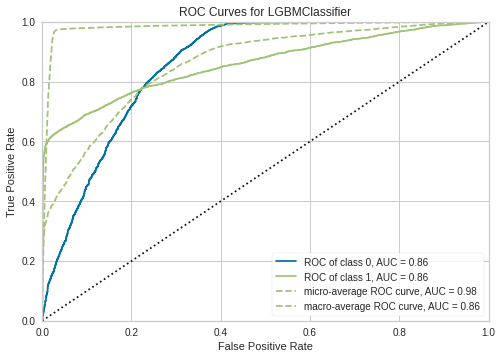

In [ ]:
plot_model(tuned_lgbm, plot = 'auc')

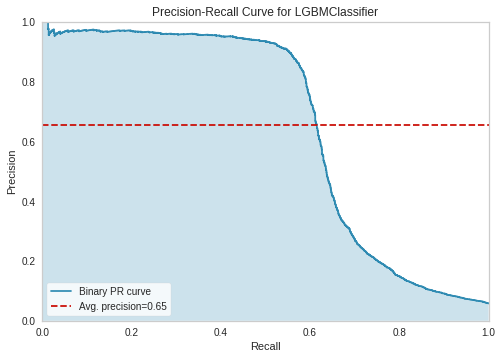

In [ ]:
plot_model(tuned_lgbm, plot = 'pr')

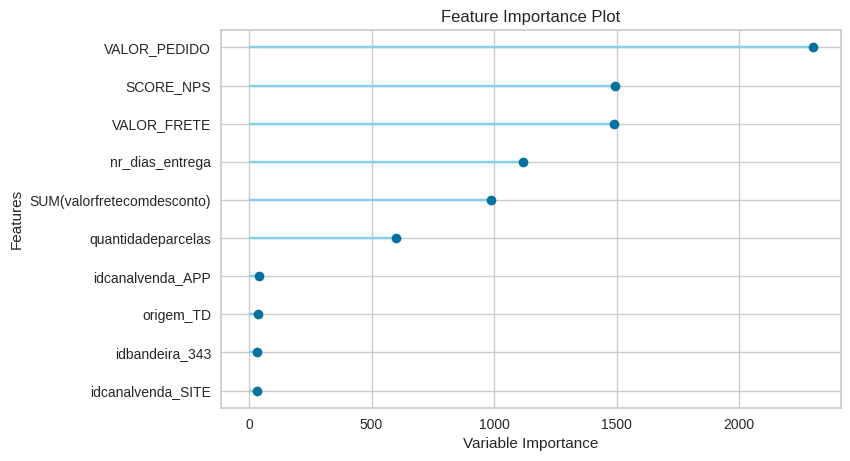

In [ ]:
plot_model(tuned_lgbm, plot='feature')

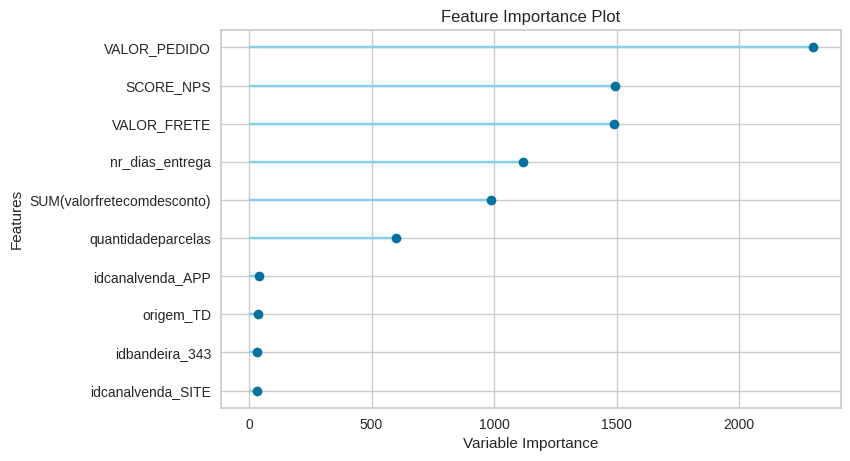

""


In [ ]:
df2 = pd.DataFrame(plot_model(tuned_lgbm, plot='feature'))
df2


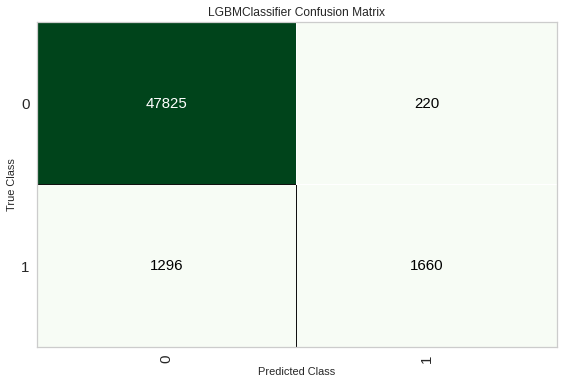

In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

In [ ]:
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9703,0.8595,0.5616,0.883,0.6865,0.6717,0.6907


,VALOR_PEDIDO,VALOR_FRETE,SUM(valorfretecomdesconto),SCORE_NPS,quantidadeparcelas,nr_dias_entrega,origem_TD,idbandeira_343,idbandeira_49,idbandeira_7,idcanalvenda_APP,idcanalvenda_MOBI,idcanalvenda_SITE,idcanalvenda_TVEN,nomedepartamento_Acessórios e Inovações,nomedepartamento_Agro Indústria e Comércio,nomedepartamento_Alimentos,nomedepartamento_Ar e Ventilação,nomedepartamento_Artesanato,nomedepartamento_Artigos para Festas,nomedepartamento_Automotivo,nomedepartamento_Bebidas,nomedepartamento_Bebês,nomedepartamento_Beleza e Saúde,nomedepartamento_Brinquedos,nomedepartamento_Calçados,nomedepartamento_Cama Mesa e Banho,nomedepartamento_Casa e Construção,nomedepartamento_Câmeras Filmadoras e Drones,nomedepartamento_DVDs e Blu-Ray,nomedepartamento_Decoração,nomedepartamento_Eletrodomésticos,nomedepartamento_Eletroportáteis,nomedepartamento_Esporte e Lazer,nomedepartamento_Ferramentas,nomedepartamento_Games,nomedepartamento_Informática,nomedepartamento_Instrumentos Musicais,nomedepartamento_Joias e Bijuterias,nomedepartamento_Livros,...,nomesetor_Telefonia Fixa,nomesetor_Televisores,nomesetor_Toalha Avulsa,nomesetor_Toalhas de Banho,nomesetor_Tratamento de Ar,nomesetor_Tratamento e Dermocosméticos,nomesetor_Travesseiro,nomesetor_Troca do Bebê,nomesetor_Tênis,nomesetor_Unha,nomesetor_Uniformes Profissionais,nomesetor_Unissex,nomesetor_Utensílios Industriais,nomesetor_Utilidades Domésticas,nomesetor_Vaporizadores e Higienizadores,nomesetor_Ventiladores e Circuladores,nomesetor_Veículos Motorizados,nomesetor_Viagens e Turismo,nomesetor_Vidros,nomesetor_Vinhos Espumante e Frisante,nomesetor_Whisky,nomesetor_Xaropes e Especiarias,nomesetor_Xbox 360,nomesetor_Xbox One,nomesetor_not_available,nomesetor_Álbuns e Presentes,nomesetor_Área de Serviço,nomesetor_Árvores de Natal,nomesetor_Áudio,nomesetor_Áudio e Iluminação,nomesetor_Óleos e Lubrificantes,nomesetor_Ótica,tipo_Boleto,tipo_Cartão Presente,tipo_Credito,tipo_Vale,tipo_not_available,TARGET,Label,Score
0,45.740002,10.840000,10.840000,49.553013,3.0,73.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9919
1,809.210022,18.209999,18.209999,51.636139,1.0,232.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9992
2,708.640015,28.740000,28.740000,61.492706,8.0,-7.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9838
3,2177.020020,78.019997,78.019997,64.691154,7.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9705
4,2301.560059,16.389999,16.389999,60.998219,1.0,3.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
predict_model(tuned_lgbm)

In [ ]:
final_lgbm = finalize_model(tuned_lgbm)

In [ ]:
val_ = predict_model(final_lgbm, data=data_val)
val_.head()

,TARGET,origem,idbandeira,VALOR_PEDIDO,idcanalvenda,VALOR_FRETE,SUM(valorfretecomdesconto),nomedepartamento,nomesetor,SCORE_NPS,quantidadeparcelas,tipo,nr_dias_entrega,Label,Score
0,0,LJ,7,489.80,MOBI,89.90,89.90,Esporte e Lazer,Bicicletas,NaN,6.0,Credito,NaN,0,0.9351
1,0,LJ,7,829.99,SITE,160.24,23.99,Móveis,Colchões,NaN,10.0,Credito,-5.0,0,0.9918
2,0,LJ,7,829.99,SITE,72.00,72.00,Móveis,Área de Serviço,14.930556,10.0,Credito,-25.0,0,0.9868
3,0,LJ,7,2260.86,MOBI,27.60,23.99,Móveis,Colchões,NaN,12.0,Credito,-3.0,0,0.9916
4,0,LJ,7,2762.86,APP,75.63,75.63,Móveis,Quartos,38.136301,1.0,Boleto,NaN,0,0.9970


In [ ]:
print(final_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=160, n_jobs=-1, num_leaves=60, objective=None,
               random_state=336, reg_alpha=0.1, reg_lambda=0.01, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
save_model(final_lgbm,'Final LGBM Model 30Mai2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.15,
                                 max_depth=-1